In [82]:
import os
from sys import argv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error




%matplotlib inline

In [123]:
#read in data
housing = pd.read_csv('housing.tgz', compression='gzip', header=0, sep=',', quotechar='"')

In [124]:
#create dataframe minus last row of nulls
housing = housing.iloc[:-1, :]

In [105]:
housing.tail()

,housing.csv,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
housing.csv           20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [125]:
housing.rename(columns = {'housing.csv': 'longitude'}, inplace=True)

In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [113]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAB0B800B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BAB253F2E8>]], dtype=object)

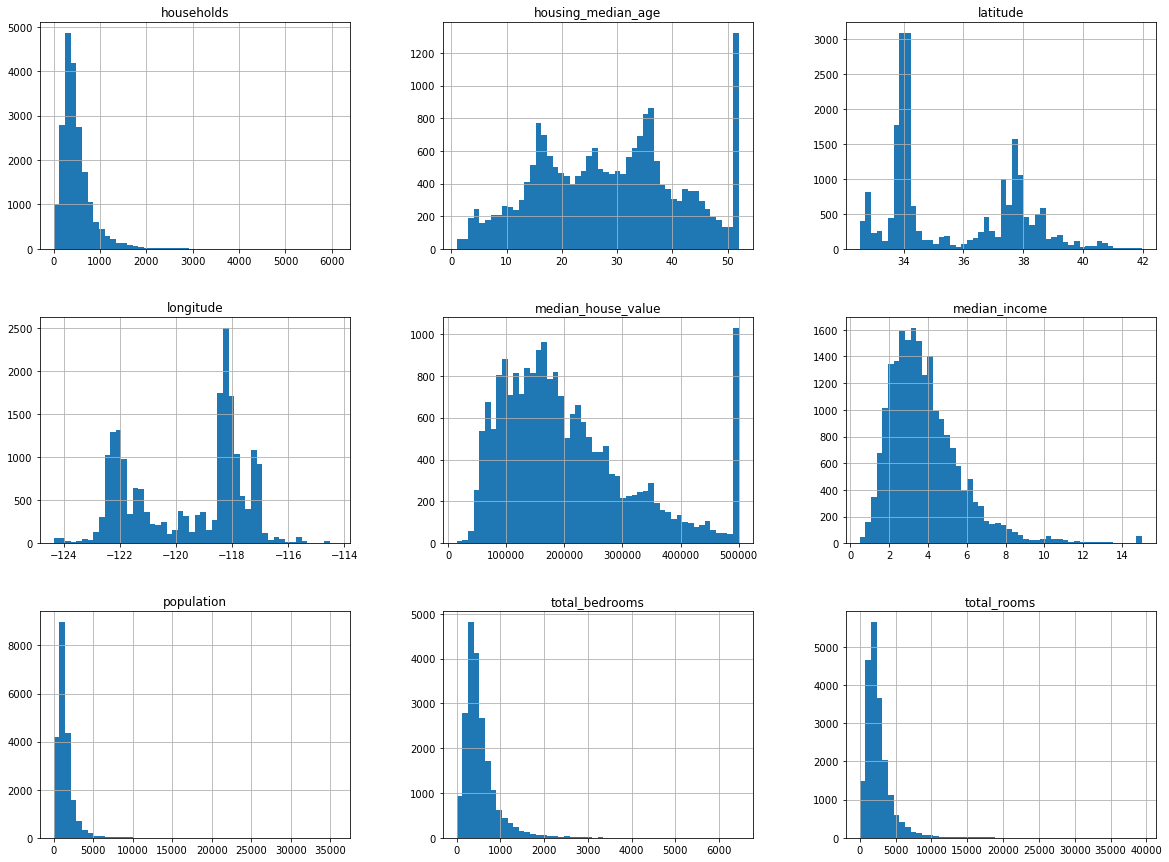

In [12]:
#Histograms of the dataset
housing.hist(bins=50, figsize=(20,15))

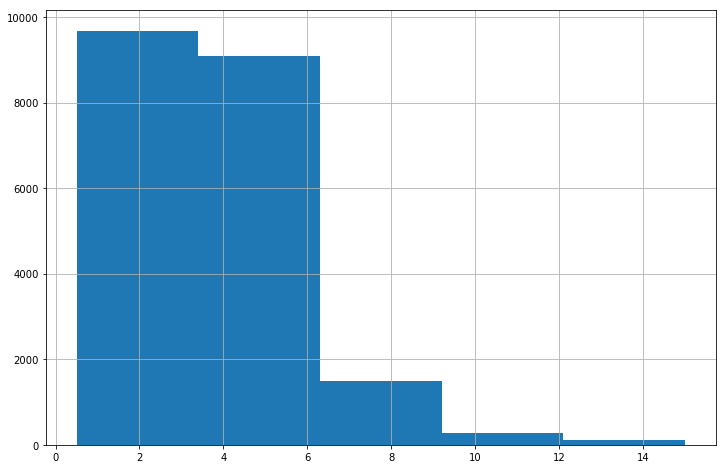

In [13]:
housing['median_income'].hist(bins=5, figsize=(12,8))



In [16]:
#Create income category attribute by dividing medain income by 1.5, rounding up and merging all cats greater than 5 in to cat 5 
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace =True) 

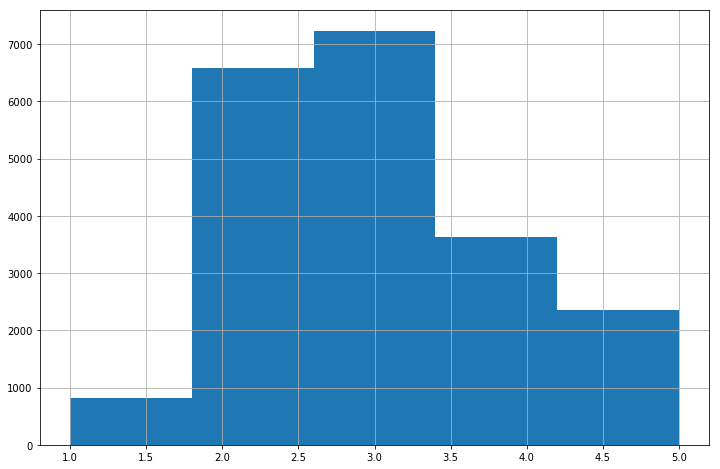

In [17]:
housing['income_cat'].hist(bins=5, figsize=(12,8))

In [142]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedroom_per_room',
       'population_per_households-'],
      dtype='object')

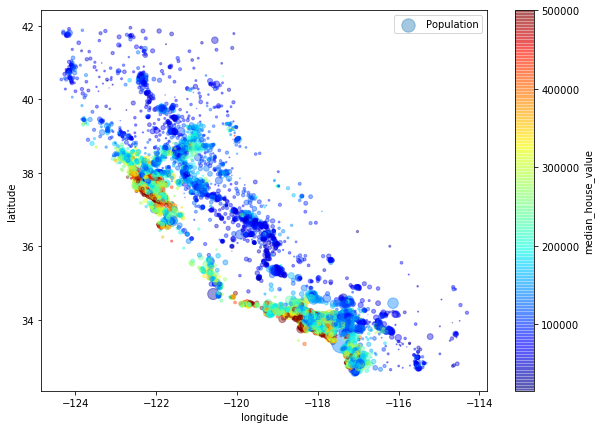

In [29]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, 
             s=housing['population']/100, label='Population', 
             figsize=(10,7),c='median_house_value', cmap = plt.get_cmap('jet'), 
             colorbar=True, sharex=False)
plt.legend()

In [30]:
corr_matrix= housing.corr()

In [31]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [32]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAB22A9518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BAB4993668>]], dtype=object)

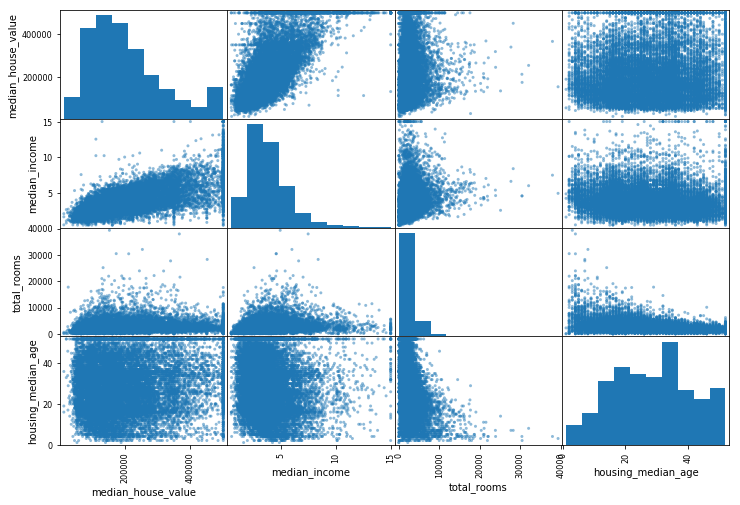

In [33]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

[0, 16, 0, 550000]

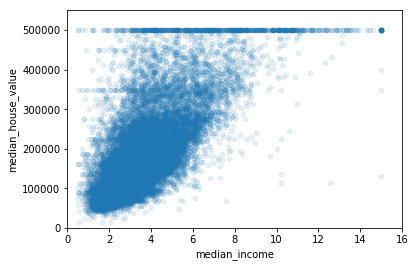

In [34]:
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha =.1)
plt.axis([0, 16, 0, 550000])


In [126]:
#Create attributes of interest from dataset features
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedroom_per_room']= housing['total_bedrooms']/housing['total_rooms']
housing['population_per_households-'] = housing['population']/housing['households']

In [36]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687160
rooms_per_household           0.146285
total_rooms                   0.135097
housing_median_age            0.114110
households                    0.064506
total_bedrooms                0.047689
population_per_households-   -0.021985
population                   -0.026920
longitude                    -0.047432
latitude                     -0.142724
bedroom_per_room             -0.259984
Name: median_house_value, dtype: float64

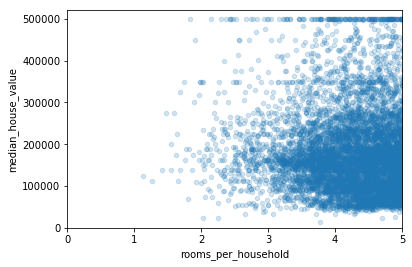

In [37]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedroom_per_room,population_per_households-
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [127]:
housing_labels = housing['median_house_value'].copy()

In [128]:
housing = housing.drop('median_house_value', axis =1)

In [129]:
#transformer class to add combined attributes

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedroooms_per_room=True):
        self.add_bedroooms_per_room = add_bedroooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedroooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

        

attr_adder = CombinedAttributesAdder(add_bedroooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
    

In [130]:
#class object to select attributes for transformation
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
        

In [131]:
#Class object to binarize selected attributes
from sklearn.preprocessing import LabelBinarizer
class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

In [132]:
"""create pipeline constructor by providing steps for data transformation. Num_pipeline tracsforms numerical values.
cat_pipeline transforms categorical features. full_pipeline merges to two pipelines into one"""


num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']


num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizerPipelineFriendly()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])


In [133]:
#fit and transfrom data with full pipeline, last step before model fit

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [135]:
#Linear regression on prepped dataset
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
#test run
data = housing.iloc[:5]
labels = housing_labels.iloc[:5]
data_prepared = full_pipeline.transform(data)
print("Prediction\t", lr.predict(data_prepared))

Prediction	 [ 406689.   435131.   375377.5  319573.   249173. ]


In [139]:
#root mean squared error of California housing median value predictions
from sklearn.metrics import mean_squared_error

housing_predictions = lr.predict(housing_prepared)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
rmse

67874.336850839871

In [140]:
#cross validate prevent over fiting
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)


In [141]:
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(-mse)

C:\Users\bobbyd\Anaconda2\envs\neural_net\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [56]:
def display_scores(scores):
    print('Scores:', scores),
    print('Mean:', scores.mean()),
    print('Standard Deviation:', scores.std())
    

In [57]:
display_scores(rmse)

Scores: [ 70160.39573851  67600.6762778   71010.18851346  69281.2950952
  70687.86706455  75093.11911877  71118.956924    70497.25174943
  76766.99118186  70559.05030237]
Mean: 71277.5791966
Standard Deviation: 2549.79346039
